In [1]:
import pandas as pd

В предыдущем ноутбуке мы исследовали русскоязычный датасет новостей <br>
сейчас мы попробуем провести весь пайплайн классификации для датасета на английском <br>
при этом, мы можем отметить, что домен - остается таким - же классификация сентимента новостей

# Загрузим данные и проведем EDA

In [ ]:
Датасет англоязычных новостей

In [ ]:
# загрузим датасет через sklrn интерфейс

In [7]:
from sklearn.datasets import fetch_20newsgroups

#загрузим обучающую выборку

newsgroups_train = fetch_20newsgroups(subset='train')

In [10]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [11]:
newsgroups_train.filenames

array(['/Users/alexeyzapolskii/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994',
       '/Users/alexeyzapolskii/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861',
       '/Users/alexeyzapolskii/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879',
       ...,
       '/Users/alexeyzapolskii/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695',
       '/Users/alexeyzapolskii/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319',
       '/Users/alexeyzapolskii/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104440'],
      dtype='<U103')

In [13]:
newsgroups_train.target.shape

(11314,)

In [ ]:
11314 записей в таргете

In [17]:
pd.Series(newsgroups_train.target).value_counts(1).head()

10    0.053032
15    0.052943
8     0.052855
9     0.052766
11    0.052590
dtype: float64

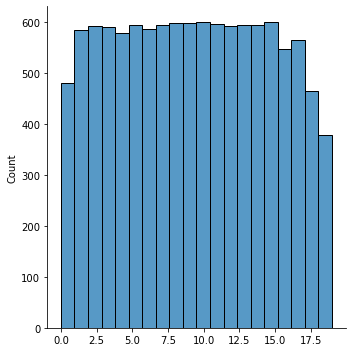

In [19]:
import seaborn as sns

sns.displot(newsgroups_train.target, bins=20)

In [ ]:
мы видим, что распределение достаточно равномерное - лишь 3 класса имеют меньше наблюдений

In [ ]:
Посмотрим на пример данных:


In [48]:
print(newsgroups_train.data[5000])

From: darice@yoyo.cc.monash.edu.au (Fred Rice)
Subject: Re: islamic genocide
Organization: Monash University, Melb., Australia.
Lines: 49

In <2943927496.1.p00261@psilink.com> "Robert Knowles" <p00261@psilink.com> writes:

>>DATE:   14 Apr 1993 23:52:11 GMT
>>FROM:   Frank O'Dwyer <frank@D012S658.uucp>
>>
>>In article <1993Apr14.102810.6059@monu6.cc.monash.edu.au> darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
>>
>>Just borrowing your post, Mr. Rice...
>>
>>#In <2943656910.0.p00261@psilink.com> "Robert Knowles" <p00261@psilink.com> writes:
>>#>Are you sure that democracy is the driving force behind
>>#>the massacres in East Timor?  It is certainly odd that so many of the worlds
>>#>massacres occur along religious lines, independently of any claims to a
>>#>democratic form of government.  Are Ireland and Northern Ireland considered
>>#>democracies?  Would you attribute their problems to democracy even though
>>#>they are democracies?  Which motivates them more, religion or democracy?


In [49]:
#соответствующая тематика:
newsgroups_train.target_names[newsgroups_train.target[5000]]

'alt.atheism'

In [ ]:
20 классов
18к записей

In [114]:
X = newsgroups_train.data
y = newsgroups_train.target

X = pd.DataFrame(X)
X.columns = ['text']

In [117]:
X.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


Мы видим следующие поля text, id и sentiment (метка класса) <br>
при этом, для теста нет метки класса - это сделано для того, чтобы узнавать оценку на кэгл - лидерборде

### Посмотрим на распределение таргета

In [60]:
pd.Series(y).value_counts(1).head() #равномерное распределение таргета

10    0.053032
15    0.052943
8     0.052855
9     0.052766
11    0.052590
dtype: float64

In [ ]:
Мы видим, что почти половина новостей - нейтральные, на позитивные приходится треть и оставшиеся 17% на негативные

## Оценим распределение длительности предложений (текстов)

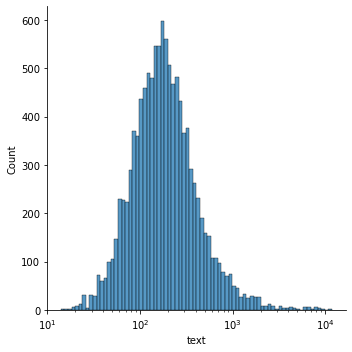

In [62]:
# токенизируем по пробелам

sns.displot(X.text.apply(lambda x: len(x.split())), log_scale=True)

In [ ]:
Большинство текстов имеет от 50 до 1000 символов
Распределение похоже на лог-нормальное

In [64]:
# токенизируем по пробелам

X.text.apply(lambda x: len(x.split())).describe()

count    11314.000000
mean       287.470126
std        541.482636
min         14.000000
25%        108.000000
50%        176.000000
75%        293.000000
max      11821.000000
Name: text, dtype: float64

In [69]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexeyzapolskii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
1) Привести в lower-case
2) Убрать знаки пунктуации
3) Токенизация по словам
4) Стемминг/леммитизация
5) ..

## Punctuation Removal: 


In [70]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
уберем пунктуацию (знаки препинания)

## Stop word removal

In [71]:
#Stop words present in the library

from nltk.corpus import stopwords
from pymystem3 import Mystem



In [72]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
#Create lemmatizer and stopwords list
mystem = Mystem() 
stopwords = stopwords.words("english")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stopwords\
              and token != " " \
              and token.strip() not in string.punctuation]
    
    text = " ".join(tokens)
    
    return text


In [ ]:
будем использовать Snowball Stemmer

In [118]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')

In [119]:
preprocess_text("I was singing in the rain, just flowers growing in the garden")



'singing rain flowers growing garden'

In [119]:
preprocess_text("I was singing in the rain, just flowers growing in the garden")



'singing rain flowers growing garden'

In [140]:
preprocess_text_stem("I was singing in the rain, just flowers growing in the garden")



'sing rain flower grow garden'

In [139]:
# Заменим лемматизатор в пайплайне на стеммы
#проблема с очисткой от пунктуации

#Preprocess function
def preprocess_text_stem(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [snowball.stem(x) for x in text.lower().split()] 
    tokens = [token for token in tokens if token not in stopwords\
              and token != " " \
              and token.strip() not in string.punctuation]
    
    text = " ".join(tokens)
    
    return text


In [74]:
print(X.loc[8261].text)

'From: m_klein@pavo.concordia.ca (CorelMARK!)\nSubject: Re: cubs & expos roster questions\nNews-Software: VAX/VMS VNEWS 1.41    \nNntp-Posting-Host: pavo1.concordia.ca\nOrganization: Concordia University\nLines: 26\n\nIn article <0096B0F0.C5DE05A0@Msu.oscs.montana.edu>, alird@Msu.oscs.montana.edu writes...\n>In article <1993Apr15.003015.1@vmsb.is.csupomona.edu>, cvadrnlh@vmsb.is.csupomona.edu writes:\n>>Today (4/14) Cubs activated P Mike Harkey from DL, whom did they move to make\n>>room for Harkey?\n>>Also, are Delino Deshields & John Wetteland of the Expos on the DL?\n>>Thanks for anyone who can give me more info!\n>>/===\n>>Ken \n>>Cal Poly, Pomona\n>>\n> \n>Wetteland is on the DL effective March 26 or something like that.\n> \n>rick\n\nWetteland comes off the DL on April 23rd, and will be evaluated on the 24th.\nHe is throwing well, and without pain on the side.\n\nDeShields is not on the DL.  He suffered from the chicken pox and lost\n(this is the official total) 12 pounds.  He wi

In [134]:
print(preprocess_text(X.loc[8261].text))

klein pavo concordia ca corelmark subject cubs expos roster questions news software vax vms vnews 1.41 nntp posting host pavo1 concordia ca organization concordia university lines 26 article 0096b0f0 c5de05a0 msu oscs montana edu >,  alird msu oscs montana edu writes ... article 1993apr 15.003015 1 vmsb csupomona edu >,  cvadrnlh vmsb csupomona edu writes >> today 4 14 cubs activated p mike harkey dl move make >> room harkey >> also delino deshields john wetteland expos dl >> thanks anyone give info >>/===
 >> ken >> cal poly pomona >>
 wetteland dl effective march 26 something like rick wetteland comes dl april 23rd evaluated 24th throwing well without pain side deshields dl suffered chicken pox lost official total 12 pounds back hopefully next week walker back tonight tomorrow ... corelmark montreal


In [141]:
print(preprocess_text_stem(X.loc[8261].text))

mkleinpavoconcordiaca corelmark subject cub expo roster question newssoftwar vaxvm vnew 141 nntppostinghost pavo1concordiaca organ concordia univers line 26 articl 0096b0f0c5de05a0msuoscsmontanaedu alirdmsuoscsmontanaedu write articl 1993apr150030151vmsbiscsupomonaedu cvadrnlhvmsbiscsupomonaedu write today 414 cub activ p mike harkey dl move make room harkey also delino deshield john wetteland expo dl thank anyon give info ken cal poli pomona wetteland dl effect march 26 someth like rick wetteland come dl april 23rd evalu 24th throw well without pain side deshield dl suffer chicken pox lost offici total 12 pound back hope next week walker back tonight tomorrow corelmark montreal


In [ ]:
Скорее всего, для английского языка больше подходит стемминг, а не лемматизация
можем это проверить на валидационной выборке

## Применим все шаги и получим токены:

обратим внимание, что TfidfVectorizer принимает на вход строку - а не лист, те токенизацию производит самостоятельно

In [143]:
X['tokenized'] = X.text.apply(lambda x: preprocess_text_stem(x))

In [144]:
X.head()

,text,tokenized
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,lerxstwamumdedu thing subject car nntppostingh...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,guykuocarsonuwashingtonedu guy kuo subject si ...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,twillisececnpurdueedu thoma e willi subject pb...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,jgreenamb joe green subject weitek p9000 organ...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,jcmheadcfaharvardedu jonathan mcdowel subject ...


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
Векторизируем текст 

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [145]:
X = X.tokenized
y = y

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
vectoriser = TfidfVectorizer()

X_train = vectoriser.fit_transform(X_train)
# Convert sparse matrix to dataframe
#X_train = pd.DataFrame.sparse.from_spmatrix(X_train)

# Transform to feature matrix
X_test = vectoriser.transform(X_test)
# Convert sparse matrix to dataframe
#X_test = pd.DataFrame.sparse.from_spmatrix(X_test)
# Add column names to make it more readible


In [148]:
X_train.shape, X_test.shape

((7580, 96752), (3734, 96752))

In [ ]:
107479  - очень сильно раздулась размерность!

In [ ]:
Размерность после степинга  - 96752 - чуть меньше в сравнении с лемматизацией

In [94]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Решение:
    увеличить кол-во итераций +
    стандартизовать/нормализовать данные
    
рассмотрим все варианты

In [149]:
lg = LogisticRegression(max_iter=10000)

In [150]:
lg.fit(X_train, y_train) # сошлось

LogisticRegression(max_iter=10000)

In [97]:
from sklearn.metrics import classification_report

In [98]:
# лемматизация

print(classification_report(y_test, lg.predict(X_test))) #качество на тесте

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       148
           1       0.72      0.85      0.78       175
           2       0.82      0.81      0.82       191
           3       0.76      0.82      0.79       197
           4       0.93      0.81      0.87       197
           5       0.85      0.91      0.88       188
           6       0.78      0.84      0.81       188
           7       0.88      0.93      0.90       207
           8       0.93      0.93      0.93       212
           9       0.96      0.96      0.96       186
          10       0.97      0.97      0.97       184
          11       0.99      0.91      0.95       209
          12       0.86      0.83      0.85       199
          13       0.96      0.95      0.96       194
          14       0.96      0.94      0.95       193
          15       0.88      0.93      0.90       202
          16       0.93      0.94      0.94       195
          17       0.97    

In [151]:
# стемминг

print(classification_report(y_test, lg.predict(X_test))) #качество на тесте

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       148
           1       0.77      0.85      0.81       175
           2       0.84      0.83      0.83       191
           3       0.75      0.82      0.79       197
           4       0.93      0.82      0.87       197
           5       0.85      0.91      0.88       188
           6       0.76      0.82      0.79       188
           7       0.91      0.94      0.92       207
           8       0.95      0.94      0.95       212
           9       0.98      0.98      0.98       186
          10       0.98      0.97      0.98       184
          11       0.99      0.91      0.95       209
          12       0.85      0.84      0.85       199
          13       0.97      0.96      0.97       194
          14       0.97      0.96      0.97       193
          15       0.82      0.91      0.86       202
          16       0.94      0.95      0.95       195
          17       0.98    

In [ ]:
кажется, что стемминг работает чуть лучше для английского текста, что и ожидаемо
сравним с результатами на тесте

Как мы видим, обычный лог рег довольно хорошо справился с проблемой

Сравним данное решение с 
    - Стемминг вместо лемматизации
    - Возьмем готовые эмбеддинги из датасета

In [ ]:
Измерим качество на второй части датасета - 

In [99]:
newsgroups_test = fetch_20newsgroups(subset='test')

In [105]:
print(newsgroups_test.data[10])

From: Greg.Reinacker@FtCollins.NCR.COM
Subject: Windows On-Line Review uploaded
Reply-To: Greg.Reinacker@FtCollinsCO.NCR.COM
Organization: NCR Microelectronics, Ft. Collins, CO
Lines: 12

I have uploaded the Windows On-Line Review shareware edition to
ftp.cica.indiana.edu as /pub/pc/win3/uploads/wolrs7.zip.

It is an on-line magazine which contains reviews of some shareware
products...I grabbed it from the Windows On-Line BBS.

--
--------------------------------------------------------------------------
Greg Reinacker                          (303) 223-5100 x9289
NCR Microelectronic Products Division   VoicePlus 464-9289
2001 Danfield Court                     Greg.Reinacker@FtCollinsCO.NCR.COM
Fort Collins, CO  80525



In [103]:
newsgroups_test.target, newsgroups_test.target.shape, len(newsgroups_test.data)

(array([ 7,  5,  0, ...,  9,  6, 15]), (7532,), 7532)

In [152]:
X_holdout = newsgroups_test.data
y_hold = newsgroups_test.target

In [153]:
X_holdout = pd.DataFrame(X_holdout)

X_holdout.columns = ['text']

X_holdout.head()

,text
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...


In [108]:
X_holdout.shape

(7532, 1)

In [154]:
X_holdout['tokenized'] = X_holdout.text.apply(lambda x: preprocess_text_stem(x))

In [155]:

valid = vectoriser.transform(X_holdout['tokenized'])
# Convert sparse matrix to dataframe
#X_train = pd.DataFrame.sparse.from_spmatrix(X_train)




In [156]:
pred = lg.predict(valid)

In [157]:
pred.shape

(7532,)

In [113]:
print(classification_report(y_hold, pred)) #качество на тесте

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       319
           1       0.66      0.79      0.72       389
           2       0.73      0.75      0.74       394
           3       0.72      0.72      0.72       392
           4       0.81      0.80      0.81       385
           5       0.81      0.74      0.78       395
           6       0.77      0.85      0.81       390
           7       0.88      0.90      0.89       396
           8       0.94      0.93      0.93       398
           9       0.85      0.92      0.89       397
          10       0.92      0.95      0.94       399
          11       0.96      0.87      0.91       396
          12       0.74      0.75      0.74       393
          13       0.86      0.82      0.84       396
          14       0.88      0.90      0.89       394
          15       0.79      0.93      0.86       398
          16       0.72      0.89      0.80       364
          17       0.96    

In [159]:
print(classification_report(y_hold, pred)) #качество на тесте

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       319
           1       0.69      0.78      0.73       389
           2       0.75      0.74      0.74       394
           3       0.70      0.76      0.73       392
           4       0.84      0.79      0.82       385
           5       0.83      0.77      0.80       395
           6       0.74      0.84      0.79       390
           7       0.91      0.87      0.89       396
           8       0.96      0.92      0.94       398
           9       0.90      0.94      0.92       397
          10       0.95      0.96      0.96       399
          11       0.94      0.88      0.91       396
          12       0.72      0.78      0.75       393
          13       0.87      0.86      0.86       396
          14       0.91      0.91      0.91       394
          15       0.75      0.90      0.82       398
          16       0.71      0.89      0.79       364
          17       0.96    

In [ ]:
На отложенной выборке уже нельзя однозначно сказать, что лучше - лемматизация или стемминг

In [ ]:
Возможно тут все зависит от более тонкой и проработанной настройки пайплайна

In [ ]:
Видим, что качество на отложенной выборке существенно просело, но остается на вполне достойном уровне

In [ ]:
Сравним результат с стеммами вместо лематизации